In [1]:
import pandas as pd

# Load the CSV
df = pd.read_csv("Nba_data.csv")

# Show the first 5 rows to check if it loaded correctly
print(df.head())


                    Player Team  GP   PTS   REB  AST  STL  BLK    FG%    3P%  \
0              Joel Embiid  PHI  66  33.1  10.2  4.2  1.0  1.7  0.548  0.330   
1              Luka Doncic  DAL  66  32.4   8.6  8.0  1.4  0.5  0.496  0.349   
2           Damian Lillard  POR  58  32.2   4.8  7.3  0.9  0.3  0.463  0.371   
3  Shai Gilgeous-Alexander  OKC  68  31.4   4.8  5.5  1.6  1.0  0.510  0.345   
4    Giannis Antetokounmpo  MIL  63  31.1  11.8  5.7  0.8  0.8  0.553  0.275   

     FT%  
0  0.857  
1  0.744  
2  0.916  
3  0.905  
4  0.645  


In [2]:
top_scorer = df.loc[df['PTS'].idxmax()]
print(f"Top scorer: {top_scorer['Player']} ({top_scorer['PTS']} PPG)")


Top scorer: Joel Embiid (33.1 PPG)


In [3]:
df['ALL_AROUND'] = df['PTS'] + df['REB'] + df['AST']
top_all_around = df.loc[df['ALL_AROUND'].idxmax()]
print(f"Best all-around: {top_all_around['Player']} ({top_all_around['ALL_AROUND']})")


Best all-around: Luka Doncic (49.0)


In [4]:
# Highest field goal percentage
best_fg = df.loc[df['FG%'].idxmax()]['Player']

# Highest three-point percentage
best_3p = df.loc[df['3P%'].idxmax()]['Player']

# Highest free throw percentage
best_ft = df.loc[df['FT%'].idxmax()]['Player']

print(f"Highest FG%: {best_fg}")
print(f"Highest 3P%: {best_3p}")
print(f"Highest FT%: {best_ft}")


Highest FG%: Rudy Gobert
Highest 3P%: Stephen Curry
Highest FT%: Tyler Herro


In [5]:
num_25plus = df[df['PTS'] >= 25].shape[0]
print(f"Players with 25+ PPG: {num_25plus}")


Players with 25+ PPG: 16


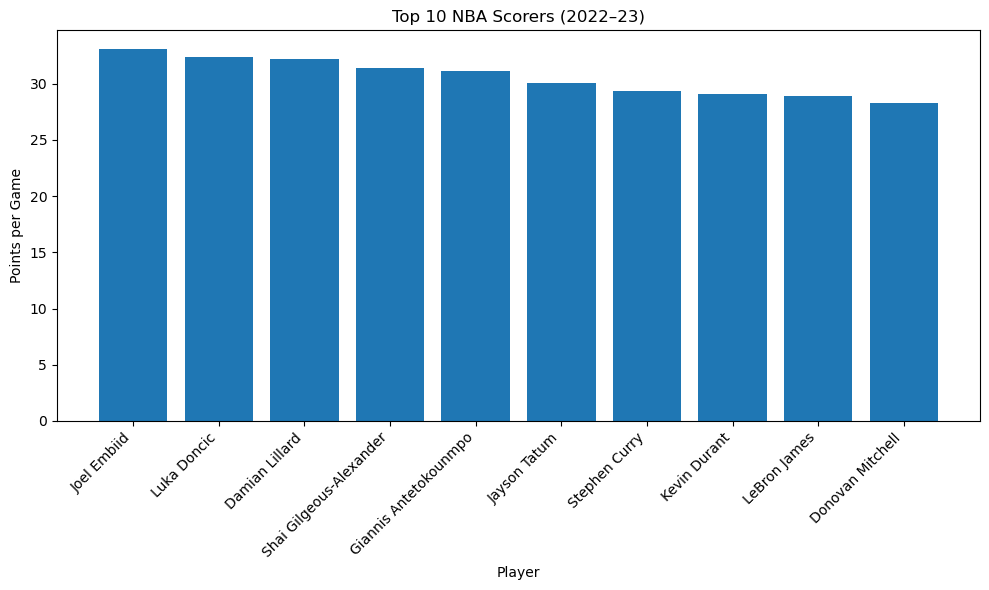

In [6]:
#1. Top 10 Scorers Bar Chart

import matplotlib.pyplot as plt

# Sort and select top 10 by points per game
top10 = df.sort_values(by='PTS', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.bar(top10['Player'], top10['PTS'])
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 NBA Scorers (2022–23)')
plt.xlabel('Player')
plt.ylabel('Points per Game')
plt.tight_layout()
plt.show()


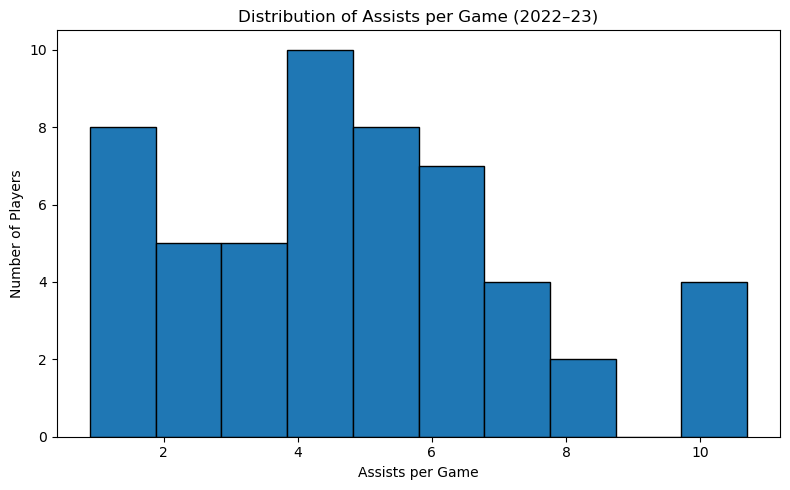

In [7]:
#2. Histogram: Distribution of Assists
plt.figure(figsize=(8, 5))
plt.hist(df['AST'], bins=10, edgecolor='black')
plt.title('Distribution of Assists per Game (2022–23)')
plt.xlabel('Assists per Game')
plt.ylabel('Number of Players')
plt.tight_layout()
plt.show()




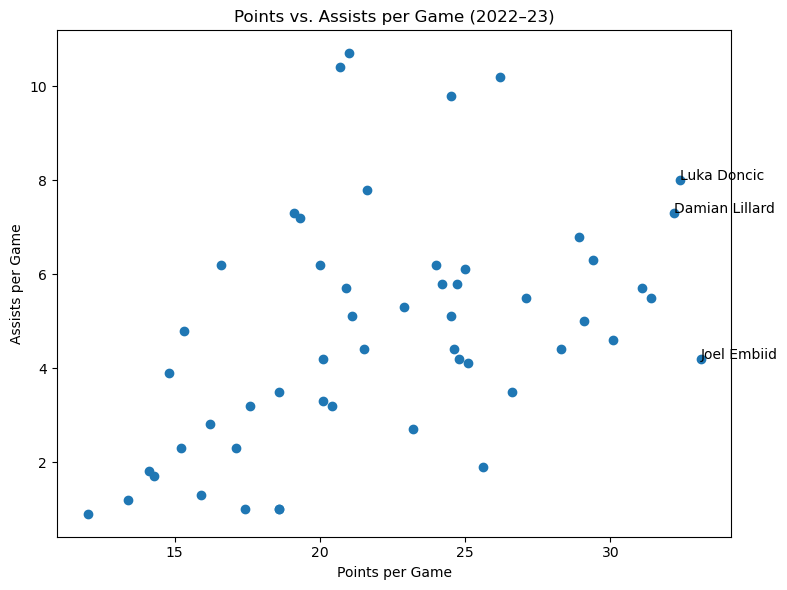

In [8]:
#3. Scatter Plot: Points vs. Assists
plt.figure(figsize=(8, 6))
plt.scatter(df['PTS'], df['AST'])
plt.title('Points vs. Assists per Game (2022–23)')
plt.xlabel('Points per Game')
plt.ylabel('Assists per Game')

# Optional: label the top 3 players for PTS
for i, row in df.nlargest(3, 'PTS').iterrows():
    plt.annotate(row['Player'], (row['PTS'], row['AST']))

plt.tight_layout()
plt.show()

